In [59]:
#Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Data Collection and Analysis

In [60]:
insurance_data = pd.read_csv("/content/insurance.csv")

In [61]:
#printing the first 5 rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
#getting the shape of the dataset
insurance_data.shape

(1338, 7)

In [63]:
#getting some information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
#checking fot the missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Data Analysis

In [65]:
#statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-66-3e1788635c9a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




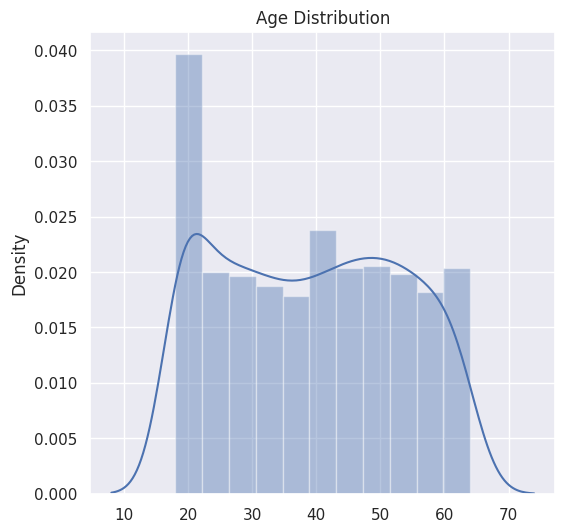

In [66]:
#distribution of the age column
sns.set()
plt.figure(figsize = (6,6))
sns.distplot([insurance_data["age"]])
plt.title("Age Distribution")
plt.show()

In [67]:
#checking the age distribution using plotly
import plotly.express as px
px.pie(data_frame = insurance_data,names = "age")

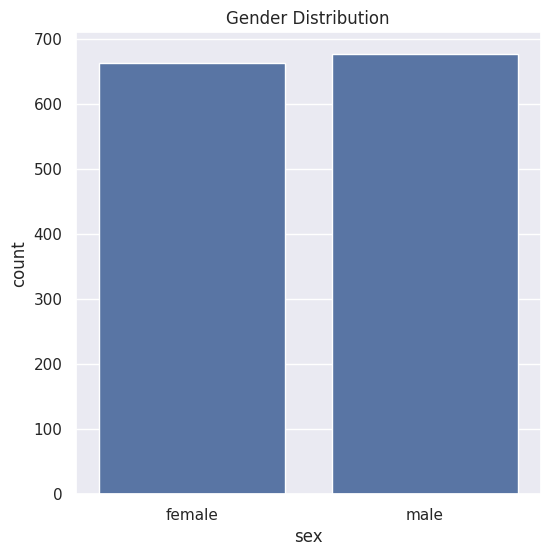

In [68]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x = "sex",data = insurance_data)
plt.title("Gender Distribution")
plt.show()

In [69]:
#analyzing the gender distribution using the plotly library
px.pie(data_frame = insurance_data,names = "sex",hole = 0.5)

In [70]:
insurance_data["sex"].value_counts()

,count
sex,
male,676
female,662


<ipython-input-71-ad10ab8622ed>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




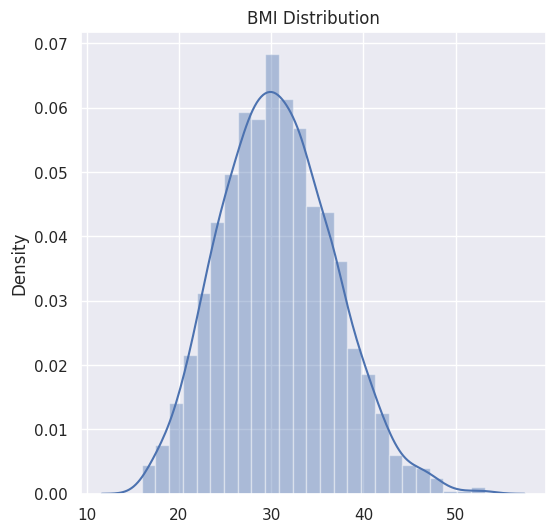

In [71]:
#bmi distribution
sns.set()
plt.figure(figsize = (6,6))
sns.distplot([insurance_data["bmi"]])
plt.title("BMI Distribution")
plt.show()

Normal BMI Range --> 18.5 to 24.9

In [72]:
#bmi distribution using plotly library
px.histogram(data_frame = insurance_data,x = "bmi")

In [73]:
insurance_data["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


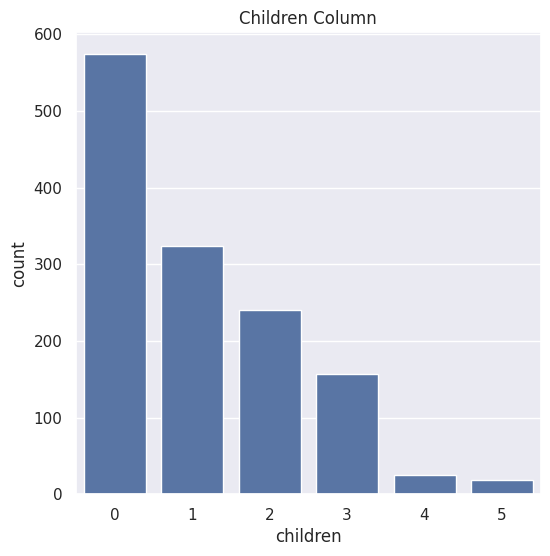

In [74]:
#analyzing the children column
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(data = insurance_data,x = "children")
plt.title("Children Column")
plt.show()

In [75]:
#analyzing the childre column uisng the plotly library
px.pie(data_frame = insurance_data,names = "children",hole = 0.3)

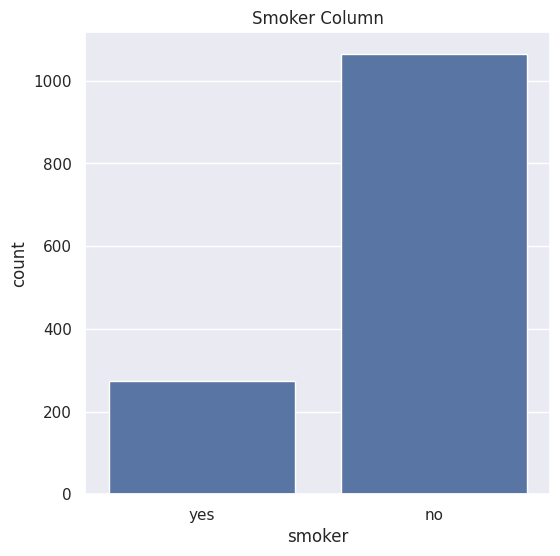

In [76]:
#analyzing the smoker column
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(data = insurance_data,x = "smoker")
plt.title("Smoker Column")
plt.show()
#

In [77]:
#analyzing the smoker column using the plotly library
px.pie(data_frame = insurance_data,names = "smoker",hole = 0.3)

In [78]:
insurance_data["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


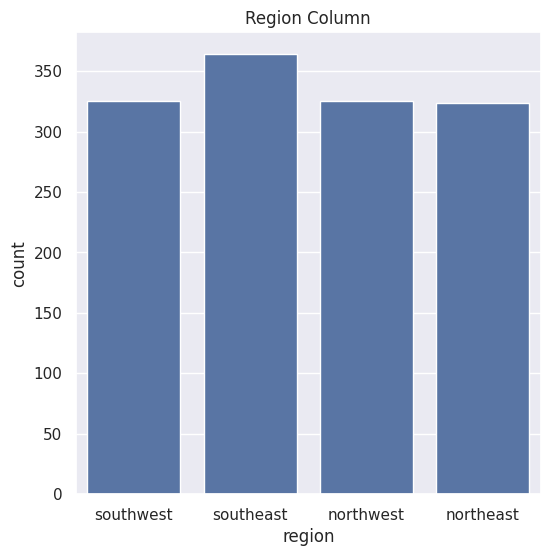

In [79]:
#analyzing the region column
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(data = insurance_data,x = "region")
plt.title("Region Column")
plt.show()

In [80]:
#analyzing the region column using the plotly library
px.pie(data_frame = insurance_data,names = "region",hole = 0.1)

In [81]:
insurance_data["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-82-b2dab3d3a44d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




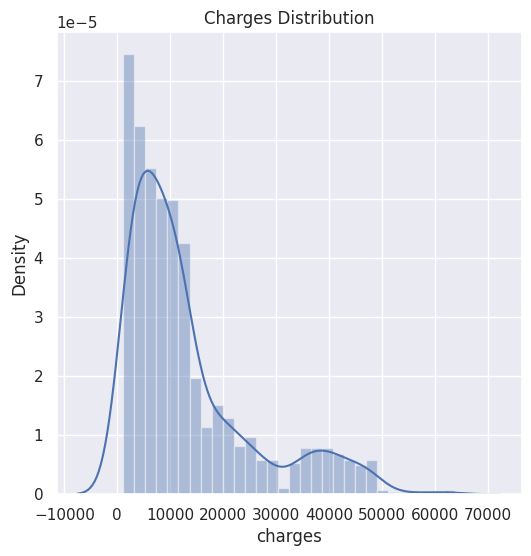

In [82]:
#distribution of the charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_data["charges"])
plt.title("Charges Distribution")
plt.show()

In [83]:
#distribution of the charges value uisng the plotly library
px.histogram(data_frame = insurance_data,x = "charges")

# Data Pre- Processing
# Encoding the Categorical Features

In [84]:
#encoding the sex column
insurance_data.replace({"sex":{"male":0,"female":1}},inplace = True)

#encoding the smoker column
insurance_data.replace({"smoker":{"yes":0,"no":1}},inplace = True)

#encoding the region column
insurance_data.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace = True)

In [85]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting the features and the target

In [86]:
X = insurance_data.drop(columns= "charges",axis = 1)
Y= insurance_data["charges"]

In [87]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [88]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into training and testing

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [90]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training
# Linear Regression

In [91]:
#creating the model
model = LinearRegression()


In [92]:
#fitting the training data to the model
model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [93]:
#prediction on training data
training_data_prediction = model.predict(X_train)

In [94]:
#R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [95]:
print(r2_train)

0.751505643411174


In [96]:
#prediction on testing data
testing_data_prediction = model.predict(X_test)

In [97]:
#R squared value
r2_test = metrics.r2_score(Y_test,testing_data_prediction)

In [98]:
print(r2_test)

0.7447273869684076


In [106]:
#predictions made by the classifier
print(testing_data_prediction)



[ 1520.59242161 11570.5920178  10082.43849883  2246.21754312
  7881.28362035 11081.50227956  3538.24791808   698.03224036
 12223.4851558   9611.93217623 11657.51046259  4891.0539656
 29947.50192274  -370.8384887  12401.36048618 13243.21522903
  3814.42216541  7883.39384825 29431.34485576  2362.83672121
 12505.50452609  2256.75277238 34468.01948464 31742.4859866
 30306.19118561  9027.76110059  1923.87420399 15247.09503907
  6542.61302531  2104.79910554  9484.36642532  5794.91649267
  4425.26853454  5015.3811241   9579.4545934   4601.74838962
 29875.58083252  6797.04084444 27239.25811383 13999.0938259
   313.55184653 28415.75044713  7886.54751277  1478.09056648
 10273.28966107  8003.09003405 11612.15283896  8175.95966058
 10753.45200738 13802.18082647  5740.90172027  -737.13333209
 26346.21771217 37192.66032995  7364.09646118 17845.51752284
  1412.63748094 11042.48090545  2159.33597148 34066.1609094
 11646.83178834   874.98548929  4020.66706965 35913.0386546
 -1034.71506651 13963.4947048

In [110]:
print("Y-intercept                :",model.intercept_)
print("slope of the line          :",model.coef_)
print("Mean Absolute Error        :",metrics.mean_absolute_error(Y_test,testing_data_prediction))
print("Mean Squared Error         :",metrics.mean_squared_error(Y_test,testing_data_prediction))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(Y_test,testing_data_prediction)))
print("R2 Score                   :",metrics.r2_score(Y_test,testing_data_prediction))


Y-intercept                : 11357.668742540951
slope of the line          : [   251.40512196     26.11715966    330.64637157    580.27438296
 -23928.10171061    212.22242728]
Mean Absolute Error        : 4267.213826730733
Mean Squared Error         : 38337035.48643885
Root Mean Squared Error    : 6191.690842285236
R2 Score                   : 0.7447273869684076


# Building the Predictive System

In [114]:
input_data = (32,0,28.88,0,1,3)

#changing the input data to the numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[5660.26542737]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

